<a href="https://colab.research.google.com/github/iam-fern/real_data/blob/main/CHNS_pexam_pub_12_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import random
import statsmodels.api as sm
%matplotlib inline
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# where your file is located
FILE_LOCATION = '/content/drive/My Drive/pattern_realdata/pexam_pub_12.sas7bdat'

In [ ]:
df = pd.read_sas(FILE_LOCATION)
df
#df.head()

/usr/local/lib/python3.7/dist-packages/pandas/io/sas/sas7bdat.py:800: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._byte_chunk[jb, :].view(dtype=self.byte_order + "d")


,IDind,U25,U26,U27,U28,U29,U34,U35,U36,U424,...,U16,U17,U18,U19,U1D,CM1,U7_91,U8_91,U9_91,temp
0,1.111010e+11,0.0,NaN,NaN,NaN,NaN,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.111010e+11,1.0,28.0,0.0,NaN,360.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.4
2,1.111010e+11,0.0,NaN,NaN,NaN,NaN,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.111010e+11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.4
4,1.111010e+11,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126403,5.523040e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,36.7
126404,5.523042e+11,1.0,18.0,1.0,12.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.0
126405,5.523042e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.1
126406,5.523042e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.0


###### **U23** #OF YEARS HAD HIGH BLOOD PRESSURE ปีมีความดันโลหิตสูง
###### **U24B** AGE (YEARS) AT DIABETES DIAGNOSIS อายุ (ปี) ที่การวินิจฉัยโรคเบาหวาน
###### **U36** AVG # OF CUPS OF TEA DRINKS PER DAY จำนวนเครื่องดื่มชาเฉลี่ยต่อวัน
###### **U39** AVG #OF CUPS OF COFFEE DRINKS PER DAY จำนวนดื่มกาแฟเฉลี่ยต่อวัน
###### **U42** BEER: #OF BOTTLES DRINKS EACH WEEK จำนวนดื่มเบียร์เฉลี่ยทุกสัปดาห์
###### **U236** SUGARED FRUIT DRINKS PER WEEK เครื่องดื่มผลไม้รสหวานต่อสัปดาห์

###### >>> homo
________________________________________________________________________________

###### **U24W2** AGE AT MOST RECENT CANCER DIAGNOSIS? อายุที่วินิจฉัยมะเร็งล่าสุด?
###### **U24X** AGE FIRST DIAGNOSED W/CANCER? ตรวจพบ/เป็นมะเร็งในวัยแรกรุ่นหรือไม่?
###### **U24Y01** LUNG CANCER โรคมะเร็งปอด
###### **U24Y02** STOMACH CANCER มะเร็งกระเพาะอาหาร
###### **U24Y03** HEPATIC CARCINOMA มะเร็งตับ

###### >>> homo
________________________________________________________________________________

###### **U26** AGE (YEARS) STARTED SMOKING CIGARETTES อายุ (ปี) ที่เริ่มสูบบุหรี่
###### **U28** #OF CIGARETTES SMOKES PER DAY จำนวนบุหรี่ต่อวัน
###### **U29** #OF MONTHS AGO STOPPED SMOKING เดือนที่หยุดสูบบุหรี่
###### **U31** AGE (YEARS) STARTED SMOKING A PIPE อายุ (ปี) เริ่มสูบท่อสูบยา
###### **U33** #OF LIANG(50GM) TOBACCO USES PER MONTH ของเหลียง (50GM) ยาสูบใช้ต่อเดือน
###### **U42** BEER: OF BOTTLES DRINKS EACH WEEK เบียร์: ขวดดื่มทุกสัปดาห์

###### >>> homo
________________________________________________________________________________

###### **U46_93** AGE (YEARS) AT MOST RECENT INJURY อายุ (ปี) ที่ได้รับบาดเจ็บล่าสุด
###### **U47_93** #WEEKS UNABLE TO FUNCTION DUE TO INJURY สัปดาห์ที่ไม่สามารถทำงานได้เนื่องจากได้รับบาดเจ็บ
###### **U49** #WEEKS HAD TROUBLE WORKING สัปดาห์มีปัญหาในการทำงาน
###### **U44** LIQUOR: LIANG(50 GMS) DRINKS EACH WK สุรา: เหลียง (50 GMS) ดื่มทุกสัปดาห์

###### >>> homo

In [ ]:
table = df[['IDind', 'U46_93', 'U47_93', 'U49', 'U44']]
table

,IDind,U46_93,U47_93,U49,U44
0,1.111010e+11,NaN,NaN,NaN,NaN
1,1.111010e+11,NaN,NaN,NaN,NaN
2,1.111010e+11,NaN,NaN,NaN,NaN
3,1.111010e+11,NaN,NaN,NaN,NaN
4,1.111010e+11,NaN,NaN,NaN,NaN
...,...,...,...,...,...
126403,5.523040e+11,NaN,NaN,NaN,NaN
126404,5.523042e+11,NaN,NaN,NaN,2.0
126405,5.523042e+11,NaN,NaN,NaN,NaN
126406,5.523042e+11,NaN,NaN,NaN,NaN


In [ ]:
# Define in which columns to look for missing values.
table1 = table.dropna(subset=['U46_93', 'U47_93', 'U49', 'U44'])
table1

,IDind,U46_93,U47_93,U49,U44
2618,2.111010e+11,46.0,2.0,3.0,2.0
12039,2.124020e+11,33.0,80.0,8.0,35.0
28573,3.212030e+11,37.0,6.0,6.0,6.0
33467,3.222030e+11,33.0,16.0,16.0,3.0
34802,3.223020e+11,1.0,1.0,1.0,7.0
35515,3.223030e+11,1.0,1.0,1.0,3.0
39829,3.711040e+11,25.0,260.0,20.0,15.0
47869,3.723020e+11,0.0,0.0,1.0,21.0
48653,3.723030e+11,0.0,1.0,1.0,1.0
48962,3.723040e+11,23.0,4.0,1.0,21.0


In [ ]:
table1.mean()

IDind     3.503128e+11
U24W2     5.221245e+01
U24Y01    1.245421e-01
U24Y02    9.890110e-02
U24Y03    7.692308e-02
dtype: float64

In [ ]:
x = table1[['U47_93', 'U49', 'U44']]
y = table1['U46_93']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
y_pred = model.predict(x)

df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

table_data_new = pd.DataFrame({ "x1"    : table1['U47_93'],
                                "x2"    : table1['U49'],
                                'x3'    : table1['U44'],
                                "y"     : df["Actual"],
                                "y_hat" : df["Predicted"]})
table_data_new["e"] = table_data_new["y"] - table_data_new["y_hat"]
table_data_new

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,x1,x2,x3,y,y_hat,e
2618,2.0,3.0,2.0,46.0,26.643895,19.356105
12039,80.0,8.0,35.0,33.0,22.823752,10.176248
28573,6.0,6.0,6.0,37.0,27.838753,9.161247
33467,16.0,16.0,3.0,33.0,34.430100,-1.430100
34802,1.0,1.0,7.0,1.0,24.620446,-23.620446
35515,1.0,1.0,3.0,1.0,25.239382,-24.239382
39829,260.0,20.0,15.0,25.0,29.180344,-4.180344
47869,0.0,1.0,21.0,0.0,22.478518,-22.478518
48653,1.0,1.0,1.0,0.0,25.548851,-25.548851
48962,4.0,1.0,21.0,23.0,22.381122,0.618878


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = table_data_new.loc[table_data_new["e"] >= -20]
data

,x1,x2,x3,y,y_hat,e
2618,2.0,3.0,2.0,46.0,26.643895,19.356105
12039,80.0,8.0,35.0,33.0,22.823752,10.176248
28573,6.0,6.0,6.0,37.0,27.838753,9.161247
33467,16.0,16.0,3.0,33.0,34.430100,-1.430100
39829,260.0,20.0,15.0,25.0,29.180344,-4.180344
48962,4.0,1.0,21.0,23.0,22.381122,0.618878
55025,3.0,1.0,1.0,51.0,25.500152,25.499848
67414,5.0,5.0,1.0,20.0,27.999709,-7.999709
83373,4.0,3.0,2.0,15.0,26.595196,-11.595196
97960,2.0,2.0,8.0,25.0,25.078427,-0.078427


In [ ]:
#data_new = data.loc[data["e"] >= -1 ]
#data_new

In [ ]:
table_data_new.to_csv('CHNS_pexam_pub_12_U24BU23U36U236.csv')
files.download('CHNS_pexam_pub_12_U24BU23U36U236.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

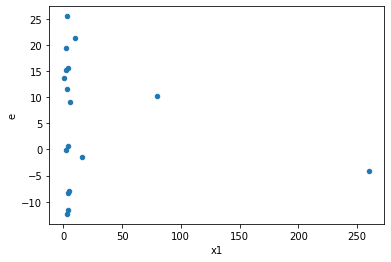

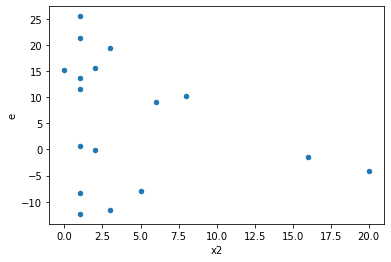

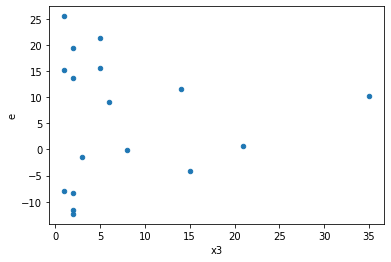

In [ ]:
data.plot(x ='x1', y='e', kind = 'scatter')
data.plot(x ='x2', y='e', kind = 'scatter')
data.plot(x ='x3', y='e', kind = 'scatter')

In [ ]:
# เรียง data จากน้อยไปมากตาม y_hat
new_table_sort = table_data_new.sort_values('y_hat')
new_table_sort.reset_index(inplace=True)
new_table_sort.drop(['index'], axis=1, inplace=True)
new_table_sort

,x1,x2,x3,y,y_hat,e
0,4.0,1.0,21.0,23.0,22.381122,0.618878
1,0.0,1.0,21.0,0.0,22.478518,-22.478518
2,80.0,8.0,35.0,33.0,22.823752,10.176248
3,3.0,1.0,14.0,35.0,23.488609,11.511391
4,1.0,1.0,7.0,1.0,24.620446,-23.620446
5,10.0,1.0,5.0,46.0,24.710772,21.289228
6,2.0,0.0,1.0,40.0,24.887438,15.112562
7,2.0,2.0,8.0,25.0,25.078427,-0.078427
8,1.0,1.0,3.0,1.0,25.239382,-24.239382
9,4.0,1.0,2.0,17.0,25.321069,-8.321069


In [ ]:
# กำหนด % การแบ่งข้อมูล
percent_data = 0.4

In [ ]:
# แบ่งข้อมูลกลุ่มที่ 1
table_new1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
table_new1

,x1,x2,x3,y,y_hat,e
0,4.0,1.0,21.0,23.0,22.381122,0.618878
1,0.0,1.0,21.0,0.0,22.478518,-22.478518
2,80.0,8.0,35.0,33.0,22.823752,10.176248
3,3.0,1.0,14.0,35.0,23.488609,11.511391
4,1.0,1.0,7.0,1.0,24.620446,-23.620446
5,10.0,1.0,5.0,46.0,24.710772,21.289228
6,2.0,0.0,1.0,40.0,24.887438,15.112562
7,2.0,2.0,8.0,25.0,25.078427,-0.078427


In [ ]:
# แบ่งข้อมูลกลุ่มที่ 1
table_new1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
y = table_new1['y']
x = table_new1[['x1', 'x2', 'x3']]
x = sm.add_constant(x)
model1 = sm.OLS(y, x).fit()

# หาค่า df กลุ่ม 1
DF1 = model1.df_resid + 1
SSE1 = model1.ssr
MSE1 = SSE1/DF1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
DF1

5.0

In [ ]:
SSE1

1078.1682286002278

In [ ]:
# แบ่งข้อมูลกลุ่มที่ 2
table_new2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]
table_new2

,x1,x2,x3,y,y_hat,e
12,4.0,2.0,5.0,41.0,25.493930,15.506070
13,3.0,1.0,1.0,51.0,25.500152,25.499848
14,1.0,1.0,1.0,0.0,25.548851,-25.548851
15,4.0,3.0,2.0,15.0,26.595196,-11.595196
16,2.0,3.0,2.0,46.0,26.643895,19.356105
17,6.0,6.0,6.0,37.0,27.838753,9.161247
18,5.0,5.0,1.0,20.0,27.999709,-7.999709
19,260.0,20.0,15.0,25.0,29.180344,-4.180344
20,16.0,16.0,3.0,33.0,34.430100,-1.430100


In [ ]:
# แบ่งข้อมูลกลุ่มที่ 2
table_new2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]
y = table_new2['y']
x = table_new2[['x1', 'x2', 'x3']]

# add constant to predictor variable
x = sm.add_constant(x)
# fit linear regression model
model2 = sm.OLS(y, x).fit()

# หาค่า df กลุ่ม 2
DF2 = model2.df_resid + 1
SSE2 = model2.ssr
MSE2 = SSE2/DF2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
DF2

6.0

In [ ]:
SSE2

1854.8615029871653

In [ ]:
# ค่าสถิติทดสอบ
GQ_test = (SSE2/DF2) / (SSE1/DF1)
GQ_test

1.4336518904501176

In [ ]:
# คำนวณค่า p-value
# pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, DF2, DF1)))
p_greater = ss.f.cdf(GQ_test, DF2, DF1)
p_less = 1.0-ss.f.cdf(GQ_test, DF2, DF1)

In [ ]:
two_tailed

0.7096042912790788

In [ ]:
p_greater

0.6451978543604606

In [ ]:
p_less

0.3548021456395394

In [ ]:
Significance = 0.05
if (p_greater) < Significance:
  print('Reject005=0 : Heteroscedasticity')
else:
  print('Reject005=1 : Homoscedasticity')

Reject005=1 : Homoscedasticity
